In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Check velocity cvgce

In [10]:
f=[]
for t in range(0, 99):
    #prof=np.mean((h5py.File('model/h5/%05d.h5'%t, 'r'))['velocities'][:,:,:,0], axis=(0,2))
    prof=np.mean((h5py.File('model/stress/a0.03_gamma1.00_Ti25.%07d.h5'%t, 'r'))['velocities'][:,:,:,0], axis=(0,2))
    L=len(prof)//2
    data_neg=prof[:L]
    data_pos=prof[L:]
    data=0.5*(-data_neg+data_pos)
    f.append(data)

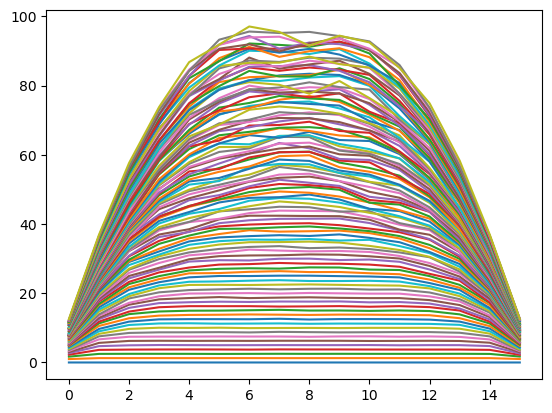

In [11]:
for t in range(0, 99):
    plt.plot(f[t])

In [12]:
0.001*0.89

0.0008900000000000001

In [15]:
0.000023779211591607422

2.3779211591607422e-05

# Garbage

In [2]:
!ls

checkup.ipynb	      log_00000.log  profiling.json    vel_prof.txt
data_T_µ.dat.csv      log_00001.log  runExperiment.py
_korali_result_cmaes  model	     stress


In [3]:
!mir.avgh5 xz velocities /home/rio/Workspace/uq_force_field/DPD_water/stress/a2.20_gamma2.82_Ti2.000009[4-8].h5 | awk '{print $1}' > vel_prof.txt

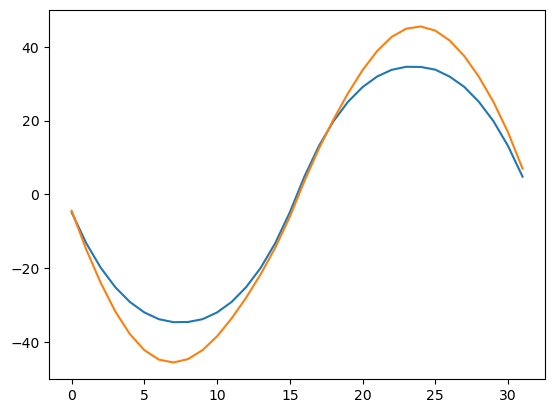

In [9]:
f0 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000000.h5")

f1 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000001.h5")

plt.plot(np.mean(f0['velocities'][:,:,:,0], axis=(0,2)))
plt.plot(np.mean(f1['velocities'][:,:,:,0], axis=(0,2)))

In [44]:
L=8
xmin=0.5
xmax=L-0.5
x=np.linspace(xmin, xmax, L)
df = pd.read_csv('velo_prof.csv', sep=' ', names = ['a', 'gamma', 'Ti']+list(x)+['eta'])
df.head()

,a,gamma,Ti,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,eta
0,2.363595,2.292231,2.0,2.594084,6.557909,8.994414,10.135281,10.134748,9.001657,6.549284,2.599917,0.382543
1,3.605563,3.323128,2.0,2.061908,5.280533,7.325198,8.280657,8.282837,7.327247,5.277019,2.056561,0.470316
2,3.605563,3.323128,2.0,2.061908,5.280533,7.325198,8.280657,8.282837,7.327247,5.277019,2.056561,0.470316
3,2.363595,2.292231,2.0,2.594084,6.557909,8.994414,10.135281,10.134748,9.001657,6.549284,2.599917,0.382543
4,2.361297,2.887183,2.0,2.275278,5.799336,8.030754,9.085522,9.089720,8.033861,5.807348,2.284465,0.428490


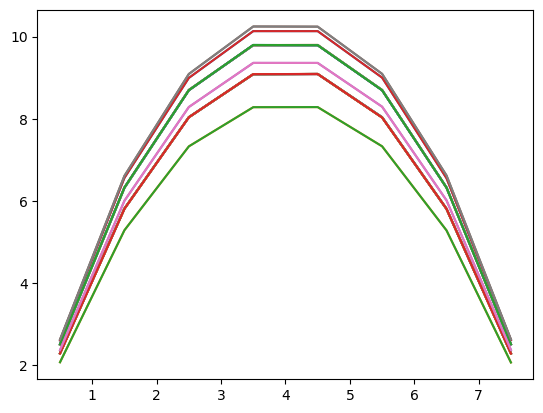

In [17]:
plt.plot(df[x].T);

In [18]:
L=8
h=L
Fx=0.5
rhow = 8.0

def quadratic_func(y, eta):
    return ((Fx*h)/(2*eta))*y*(1-y/h)

0.4284602106318199


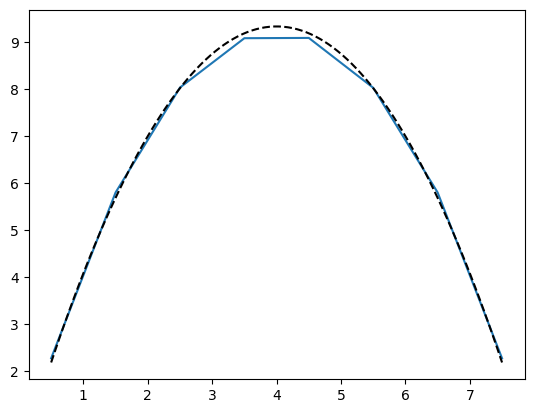

In [57]:
xmin=0.5
xmax=L-0.5

k=-5

x=np.linspace(xmin, xmax, L)

popt, pcov = curve_fit(quadratic_func, x, df[x].iloc[k])
eta=popt[0]
print(eta)

plt.plot(x, df[x].iloc[k])
u=np.linspace(xmin, xmax, 100)
plt.plot(u, quadratic_func(u, *popt), 'k--')

In [14]:
import json
data={}
list_gen=np.arange(1,35)

for gen in list_gen:
  with open('_korali_result_cmaes/gen%08d.json'%gen) as f:
    data[gen] = json.load(f)


1
2
3


KeyError: 'error_fit'

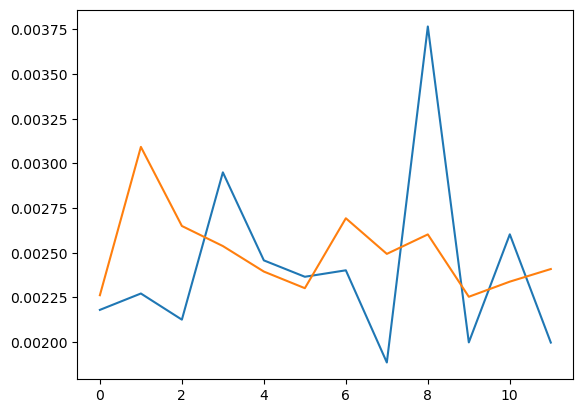

In [15]:
for gen in list_gen:
    print(gen)
    r=np.arange(len(data[gen]["Samples"]))
    plt.plot(r, [data[gen]["Samples"][k]["error_fit"] for k in r])

In [33]:
data[gen]["Samples"][10]

{'Conduit Action': 'Process Sample',
 'Current Generation': 3,
 'Experiment Id': 0,
 'F(x)': -inf,
 'Has Finished': True,
 'Module': 'Problem',
 'Operation': 'Evaluate',
 'Parameters': [3.5822988531539366, 3.298376047364961, -0.28886897366100683],
 'Sample Id': 10,
 'Worker Id': 0,
 'logLikelihood': -inf,
 'logP(x)': -inf,
 'logPosterior': -inf,
 'logPrior': -inf}

In [45]:
rho_s = 3.0
kBT_s = 0.01

#UNITS
rho_water = 997 # kg/m^3 
kb = 1.3805e-23 # S.I  
Ti = 25 # Celsius

ul = 35e-9/1.0 # real/simu : 35nm = standard length of a gas vesicle 
um = rho_water*ul**3 / rho_s
ue = kb*(Ti+273.15) / kBT_s
ut = np.sqrt(um*ul**2/ue)

# viscosity is in kg . m^-1 . s^-1
u_eta=(um/(ul*ut))
eta_water = 0.89e-3 # Pa.s

eta_water/u_eta

14.23644205171053

In [47]:
L=16
dt=0.001
D_um2_per_ms = 2.36 
D_m2_per_s = D_um2_per_ms * (1e-6)**2 / 1e-3    
D_s = D_m2_per_s / (ul**2 / ut)
print(f"Diffusion nsteps: {(L**2 / (2*D_s) )/dt}")

Diffusion nsteps: 10202640.991069345


In [41]:
D_s

0.012545771248056455

In [20]:
r=np.arange(len(data[gen]["Samples"]))
r

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [30]:
for k in r:
    print(k)
    
    data[gen]["Samples"][k]["error_fit"]

0
1
2
3
4
5
6
7
8
9
10


KeyError: 'error_fit'

In [31]:
data[gen]["Samples"][10]

{'Conduit Action': 'Process Sample',
 'Current Generation': 3,
 'Experiment Id': 0,
 'F(x)': -inf,
 'Has Finished': True,
 'Module': 'Problem',
 'Operation': 'Evaluate',
 'Parameters': [3.5822988531539366, 3.298376047364961, -0.28886897366100683],
 'Sample Id': 10,
 'Worker Id': 0,
 'logLikelihood': -inf,
 'logP(x)': -inf,
 'logPosterior': -inf,
 'logPrior': -inf}